In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from datetime import date
get_ipython().run_line_magic('matplotlib', 'inline')

In [253]:
df = pd.read_csv("data/eurusd_h1.csv", delimiter= ';')

In [254]:
df.shape

(22245, 5)

In [255]:
df.head()

,Date,Open,High,Low,Close
0,01/01/2015 00:00,1.20969,1.20976,1.20969,1.20976
1,02/01/2015 00:00,1.21038,1.21073,1.20999,1.21014
2,02/01/2015 01:00,1.21015,1.21020,1.20783,1.20869
3,02/01/2015 02:00,1.20871,1.20890,1.20668,1.20674
4,02/01/2015 03:00,1.20675,1.20723,1.20519,1.20670


In [256]:
df.describe()

,Open,High,Low,Close
count,22245.000000,22245.000000,22245.000000,22245.000000
mean,1.129757,1.130643,1.128909,1.129757
std,0.049509,0.049470,0.049530,0.049507
min,1.035580,1.037020,1.034030,1.035620
25%,1.092630,1.093490,1.091820,1.092650
50%,1.121490,1.122270,1.120620,1.121490
75%,1.168350,1.169150,1.167570,1.168340
max,1.254880,1.255530,1.254320,1.254880


In [257]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)

In [258]:
df.head()

,Date,Open,High,Low,Close
0,2015-01-01 00:00:00,1.20969,1.20976,1.20969,1.20976
1,2015-01-02 00:00:00,1.21038,1.21073,1.20999,1.21014
2,2015-01-02 01:00:00,1.21015,1.21020,1.20783,1.20869
3,2015-01-02 02:00:00,1.20871,1.20890,1.20668,1.20674
4,2015-01-02 03:00:00,1.20675,1.20723,1.20519,1.20670


In [259]:
dftime.dtypes

dtype('<M8[ns]')

In [260]:
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [261]:
hour = df["Date"].dt.hour

In [262]:
hour.head()

0    0
1    0
2    1
3    2
4    3
Name: Date, dtype: int32

In [263]:
date1 = date(2018,7,18)

In [264]:
df['Date'].dt.date == date1

0        False
1        False
2        False
3        False
4        False
         ...  
22240    False
22241    False
22242    False
22243    False
22244    False
Name: Date, Length: 22245, dtype: bool

In [265]:
df_dia = df[df['Date'].dt.date == date1]

In [266]:
df_dia.head()

,Date,Open,High,Low,Close
22077,2018-07-18 00:00:00,1.16583,1.16609,1.16565,1.16578
22078,2018-07-18 01:00:00,1.16579,1.16579,1.16484,1.16530
22079,2018-07-18 02:00:00,1.16536,1.16595,1.16525,1.16581
22080,2018-07-18 03:00:00,1.16581,1.16648,1.16544,1.16564
22081,2018-07-18 04:00:00,1.16566,1.16621,1.16544,1.16550


In [267]:
df['hour'] = df['Date'].dt.hour

In [268]:
df

,Date,Open,High,Low,Close,hour
0,2015-01-01 00:00:00,1.20969,1.20976,1.20969,1.20976,0
1,2015-01-02 00:00:00,1.21038,1.21073,1.20999,1.21014,0
2,2015-01-02 01:00:00,1.21015,1.21020,1.20783,1.20869,1
3,2015-01-02 02:00:00,1.20871,1.20890,1.20668,1.20674,2
4,2015-01-02 03:00:00,1.20675,1.20723,1.20519,1.20670,3
...,...,...,...,...,...,...
22240,2018-07-26 19:00:00,1.16630,1.16642,1.16540,1.16564,19
22241,2018-07-26 20:00:00,1.16564,1.16571,1.16402,1.16450,20
22242,2018-07-26 21:00:00,1.16449,1.16480,1.16407,1.16421,21
22243,2018-07-26 22:00:00,1.16421,1.16480,1.16418,1.16424,22


In [269]:
df_dia['Range'] = df_dia['High'] - df_dia['Low']

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_24588\4108916545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Range'] = df_dia['High'] - df_dia['Low']


In [270]:
df_dia.groupby(hour).mean()

,Date,Open,High,Low,Close,Range
Date,,,,,,
0,2018-07-18 00:00:00,1.16583,1.16609,1.16565,1.16578,0.00044
1,2018-07-18 01:00:00,1.16579,1.16579,1.16484,1.16530,0.00095
2,2018-07-18 02:00:00,1.16536,1.16595,1.16525,1.16581,0.00070
3,2018-07-18 03:00:00,1.16581,1.16648,1.16544,1.16564,0.00104
4,2018-07-18 04:00:00,1.16566,1.16621,1.16544,1.16550,0.00077
5,2018-07-18 05:00:00,1.16550,1.16564,1.16515,1.16515,0.00049
6,2018-07-18 06:00:00,1.16517,1.16518,1.16409,1.16413,0.00109
7,2018-07-18 07:00:00,1.16415,1.16452,1.16318,1.16349,0.00134
8,2018-07-18 08:00:00,1.16352,1.16380,1.16251,1.16319,0.00129


In [271]:
def session_classification(h):
    if h <= 7:
        return 'asia'
    elif h >=16: 
        return 'ny'
    else:
        return 'london'

    


In [272]:
df['Session'] = df['hour'].apply(session_classification)

In [273]:
df['Data'] = df['Date'].dt.date

In [275]:
df_session = df.groupby(['Data','Session']).agg({'High': 'max', 'Low': 'min', 'Open': 'first', 'Close': 'last'})

In [277]:
df_session.reset_index()

,Data,Session,High,Low,Open,Close
0,2015-01-01,asia,1.20976,1.20969,1.20969,1.20976
1,2015-01-02,asia,1.21073,1.20461,1.21038,1.20517
2,2015-01-02,london,1.20697,1.20256,1.20517,1.20311
3,2015-01-02,ny,1.20337,1.20004,1.20311,1.20017
4,2015-01-05,asia,1.19761,1.18677,1.19495,1.19351
...,...,...,...,...,...,...
2900,2018-07-25,london,1.17119,1.16806,1.16873,1.16965
2901,2018-07-25,ny,1.17385,1.16640,1.16965,1.17232
2902,2018-07-26,asia,1.17436,1.17219,1.17234,1.17345
2903,2018-07-26,london,1.17428,1.16729,1.17344,1.16820


In [278]:
df_session['Range'] = df_session['High'] - df_session['Low']
df_session['Movimento'] = abs(df_session['Open'] - df_session['Close'])
df_session['Ratio'] = df_session['Movimento'] / df_session['Range']

print(df_session)

                       High      Low     Open    Close    Range  Movimento  \
Data       Session                                                           
2015-01-01 asia     1.20976  1.20969  1.20969  1.20976  0.00007    0.00007   
2015-01-02 asia     1.21073  1.20461  1.21038  1.20517  0.00612    0.00521   
           london   1.20697  1.20256  1.20517  1.20311  0.00441    0.00206   
           ny       1.20337  1.20004  1.20311  1.20017  0.00333    0.00294   
2015-01-05 asia     1.19761  1.18677  1.19495  1.19351  0.01084    0.00144   
...                     ...      ...      ...      ...      ...        ...   
2018-07-25 london   1.17119  1.16806  1.16873  1.16965  0.00313    0.00092   
           ny       1.17385  1.16640  1.16965  1.17232  0.00745    0.00267   
2018-07-26 asia     1.17436  1.17219  1.17234  1.17345  0.00217    0.00111   
           london   1.17428  1.16729  1.17344  1.16820  0.00699    0.00524   
           ny       1.16820  1.16382  1.16820  1.16389  0.00438 

In [279]:
target = df_session.groupby('Data')['Movimento'].transform('max')
target2 = df_session.groupby('Data')['Ratio'].transform('max')

In [280]:
df_session['Vencedora1'] = df_session['Movimento'] == target
df_session['Vencedora2'] = df_session['Ratio'] == target2

In [281]:
df_session

High      Low     Open    Close    Range  Movimento  \
Data       Session                                                           
2015-01-01 asia     1.20976  1.20969  1.20969  1.20976  0.00007    0.00007   
2015-01-02 asia     1.21073  1.20461  1.21038  1.20517  0.00612    0.00521   
           london   1.20697  1.20256  1.20517  1.20311  0.00441    0.00206   
           ny       1.20337  1.20004  1.20311  1.20017  0.00333    0.00294   
2015-01-05 asia     1.19761  1.18677  1.19495  1.19351  0.01084    0.00144   
...                     ...      ...      ...      ...      ...        ...   
2018-07-25 london   1.17119  1.16806  1.16873  1.16965  0.00313    0.00092   
           ny       1.17385  1.16640  1.16965  1.17232  0.00745    0.00267   
2018-07-26 asia     1.17436  1.17219  1.17234  1.17345  0.00217    0.00111   
           london   1.17428  1.16729  1.17344  1.16820  0.00699    0.00524   
           ny       1.16820  1.16382  1.16820  1.16389  0.00438    0.00431   

                       Ratio  Vencedora1  Vencedora2  
Data       Session                                    
2015-01-01 asia     1.000000        True        True  
2015-01-02 asia     0.851307        True       False  
           london   0.467120       False       False  
           ny       0.882883       False        True  
2015-01-05 asia     0.132841       False       False  
...                      ...         ...         ...  
2018-07-25 london   0.293930       False       False  
           ny       0.358389        True        True  
2018-07-26 asia     0.511521       False       False  
           london   0.749642        True       False  
           ny       0.984018       False        True  

[2905 rows x 9 columns]

In [282]:
df_session[(df_session['Vencedora1']) & (df_session['Vencedora2'])== True]

,,High,Low,Open,Close,Range,Movimento,Ratio,Vencedora1,Vencedora2
Data,Session,,,,,,,,,
2015-01-01,asia,1.20976,1.20969,1.20969,1.20976,0.00007,0.00007,1.000000,True,True
2015-01-07,london,1.18966,1.18189,1.18781,1.18300,0.00777,0.00481,0.619048,True,True
2015-01-09,ny,1.18460,1.17728,1.17876,1.18406,0.00732,0.00530,0.724044,True,True
2015-01-13,london,1.18520,1.17670,1.18278,1.17696,0.00850,0.00582,0.684706,True,True
2015-01-16,london,1.16487,1.15745,1.16293,1.15842,0.00742,0.00451,0.607817,True,True
...,...,...,...,...,...,...,...,...,...,...
2018-07-18,asia,1.16648,1.16318,1.16583,1.16349,0.00330,0.00234,0.709091,True,True
2018-07-20,london,1.17230,1.16332,1.16648,1.17159,0.00898,0.00511,0.569042,True,True
2018-07-22,ny,1.17283,1.17233,1.17252,1.17240,0.00050,0.00012,0.240000,True,True


In [283]:
df_vencedoras = df_session[df_session['Vencedora1']]

In [284]:
df_vencedoras = df_vencedoras.reset_index()

In [285]:
df_vencedoras = df_vencedoras[['Data', 'Session']]

In [286]:
df_vencedoras.head()

,Data,Session
0,2015-01-01,asia
1,2015-01-02,asia
2,2015-01-05,london
3,2015-01-06,london
4,2015-01-07,london


In [287]:
df_vencedoras['Session'].value_counts()

Session
london    483
ny        444
asia      124
Name: count, dtype: int64

In [289]:
df_session = df_session.reset_index()

In [290]:
df_session['DiaSemana'] = df_session['Data'].apply(lambda x: x.weekday())

In [291]:
df_session

,Data,Session,High,Low,Open,Close,Range,Movimento,Ratio,Vencedora1,Vencedora2,DiaSemana
0,2015-01-01,asia,1.20976,1.20969,1.20969,1.20976,0.00007,0.00007,1.000000,True,True,3
1,2015-01-02,asia,1.21073,1.20461,1.21038,1.20517,0.00612,0.00521,0.851307,True,False,4
2,2015-01-02,london,1.20697,1.20256,1.20517,1.20311,0.00441,0.00206,0.467120,False,False,4
3,2015-01-02,ny,1.20337,1.20004,1.20311,1.20017,0.00333,0.00294,0.882883,False,True,4
4,2015-01-05,asia,1.19761,1.18677,1.19495,1.19351,0.01084,0.00144,0.132841,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2018-07-25,london,1.17119,1.16806,1.16873,1.16965,0.00313,0.00092,0.293930,False,False,2
2901,2018-07-25,ny,1.17385,1.16640,1.16965,1.17232,0.00745,0.00267,0.358389,True,True,2
2902,2018-07-26,asia,1.17436,1.17219,1.17234,1.17345,0.00217,0.00111,0.511521,False,False,3
2903,2018-07-26,london,1.17428,1.16729,1.17344,1.16820,0.00699,0.00524,0.749642,True,False,3


In [293]:
df_session = df_session.merge(df_vencedoras,  on='Data', how='left')

In [295]:
df_session.head()

,Data,Session_x,High,Low,Open,Close,Range,Movimento,Ratio,Vencedora1,Vencedora2,DiaSemana,Session_y
0,2015-01-01,asia,1.20976,1.20969,1.20969,1.20976,0.00007,0.00007,1.000000,True,True,3,asia
1,2015-01-02,asia,1.21073,1.20461,1.21038,1.20517,0.00612,0.00521,0.851307,True,False,4,asia
2,2015-01-02,london,1.20697,1.20256,1.20517,1.20311,0.00441,0.00206,0.467120,False,False,4,asia
3,2015-01-02,ny,1.20337,1.20004,1.20311,1.20017,0.00333,0.00294,0.882883,False,True,4,asia
4,2015-01-05,asia,1.19761,1.18677,1.19495,1.19351,0.01084,0.00144,0.132841,False,False,0,london


In [307]:
df_session = df_session.rename(columns = {'Session_x': 'Session'
                    , 'Session_y': "Target"})

In [308]:
df_session

,Data,Session,High,Low,Open,Close,Range,Movimento,Ratio,Vencedora1,Vencedora2,DiaSemana,Target
0,2015-01-01,asia,1.20976,1.20969,1.20969,1.20976,0.00007,0.00007,1.000000,True,True,3,asia
1,2015-01-02,asia,1.21073,1.20461,1.21038,1.20517,0.00612,0.00521,0.851307,True,False,4,asia
2,2015-01-02,london,1.20697,1.20256,1.20517,1.20311,0.00441,0.00206,0.467120,False,False,4,asia
3,2015-01-02,ny,1.20337,1.20004,1.20311,1.20017,0.00333,0.00294,0.882883,False,True,4,asia
4,2015-01-05,asia,1.19761,1.18677,1.19495,1.19351,0.01084,0.00144,0.132841,False,False,0,london
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2018-07-25,london,1.17119,1.16806,1.16873,1.16965,0.00313,0.00092,0.293930,False,False,2,ny
2901,2018-07-25,ny,1.17385,1.16640,1.16965,1.17232,0.00745,0.00267,0.358389,True,True,2,ny
2902,2018-07-26,asia,1.17436,1.17219,1.17234,1.17345,0.00217,0.00111,0.511521,False,False,3,london
2903,2018-07-26,london,1.17428,1.16729,1.17344,1.16820,0.00699,0.00524,0.749642,True,False,3,london


In [313]:
x = df_session[['Range', 'Movimento', 'Ratio', 'DiaSemana']]
y = df_session['Target']

0      asia
1      asia
2      asia
3      asia
4    london
Name: Target, dtype: object

In [317]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.30)

In [347]:
from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier(max_depth= 4)
mod_arvore1.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=4)

In [321]:
y_pred_test1 = mod_arvore1.predict(x_test1)

In [348]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("-------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[ 16  49  32]
 [ 57 208 188]
 [ 41 147 134]]

-------------------------------------------------

              precision    recall  f1-score   support

        asia       0.14      0.16      0.15        97
      london       0.51      0.46      0.49       453
          ny       0.38      0.42      0.40       322

    accuracy                           0.41       872
   macro avg       0.34      0.35      0.34       872
weighted avg       0.42      0.41      0.42       872



In [ ]:
print("Acuracia:", round(metrics.accuracy_score(y_test1, y_pred_test1),3))

Acuracia: 0.411


In [350]:
pip install graphviz  pydotplus

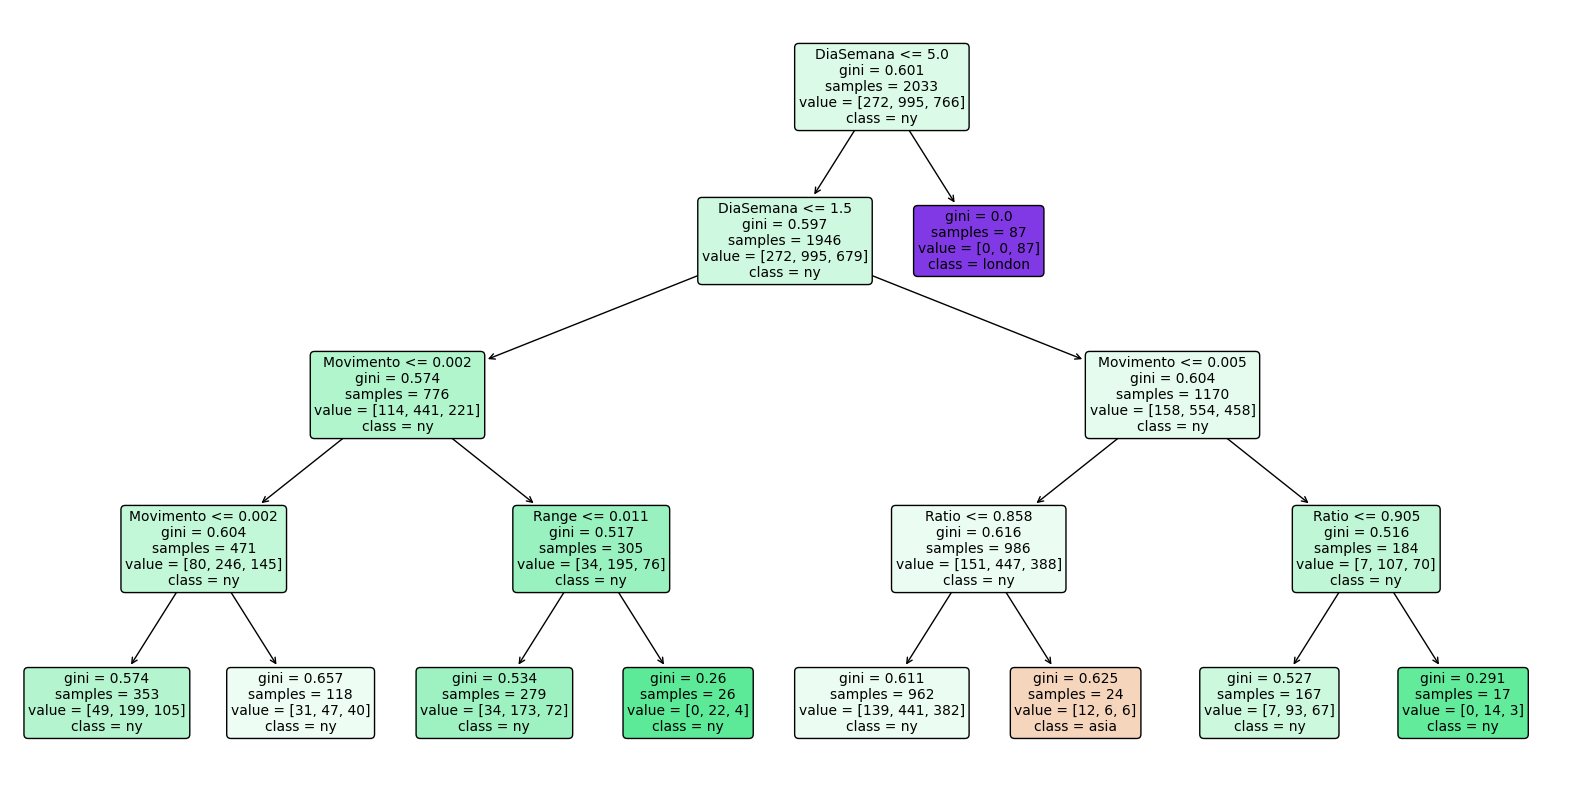

In [351]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz, plot_tree
import pydotplus

plt.figure(figsize=(20,10))                                
plot_tree(mod_arvore1
            , feature_names = x.columns[0:4]
            , class_names = ['asia','ny', 'london']
            , filled = True
            , rounded = True
            , fontsize = 10)

plt.show()

In [371]:
x1 = df_session[['Range', 'Movimento', 'Ratio', 'DiaSemana']]
y1 = df_session['Movimento']

In [372]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size = 0.30, random_state=0)

In [377]:
from sklearn.tree import DecisionTreeRegressor


mod_arvore2 = DecisionTreeRegressor(max_depth=4)
mod_arvore2.fit(x_train2, y_train2)

DecisionTreeRegressor(max_depth=4)

In [378]:
y_pred_test2 = mod_arvore2.predict(x_test2)

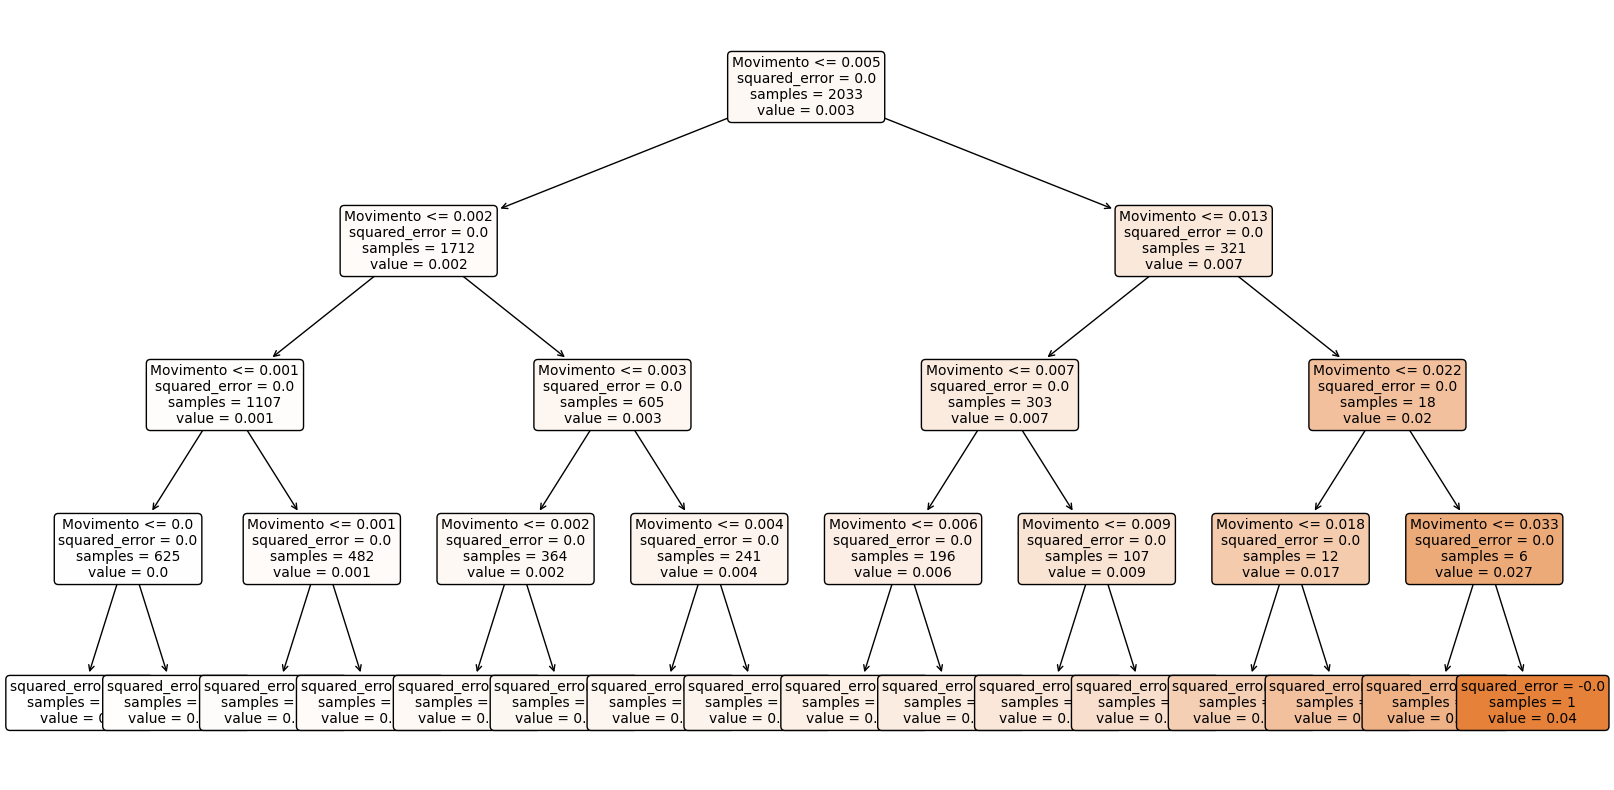

In [379]:
from sklearn.tree import export_graphviz, plot_tree

plt.figure(figsize=(20,10))
plot_tree(mod_arvore2
          , feature_names = x.columns[0:4]
          , class_names=['0', '1']
          , rounded= True
          , filled = True
          , fontsize = 10)

plt.show()

In [380]:
df2_aval = pd.DataFrame({'Real': y_test2, 'Previsto':y_pred_test2})
df2_aval

,Real,Previsto
582,0.00262,0.002774
1811,0.00166,0.001607
2249,0.00343,0.003412
1652,0.00288,0.002774
667,0.00048,0.000632
...,...,...
384,0.01224,0.010633
530,0.00442,0.004122
588,0.00205,0.002152
1017,0.00269,0.002774


In [381]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred_test2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test2)))

Mean Absolute Error: 0.00017672330738944812
Root Mean Squared Error: 0.0002722829177127093


In [382]:
print('MAE - Treinamento:', metrics.mean_absolute_error(y_train2, mod_arvore2.predict(x_train2)))
print('MAE - Teste:', metrics.mean_absolute_error(y_test2, y_pred_test2))

MAE - Treinamento: 0.00017774169156625904
MAE - Teste: 0.00017672330738944812


In [384]:

print(y_test2.mean())
print()
print('O percentual do MAE em relacao a media da base: ')
print(round(metrics.mean_absolute_error(y_test2, y_pred_test2)/y_test2.mean()*100,2))

0.0023469380733944943

O percentual do MAE em relacao a media da base: 
7.53
